In [ ]:
# 01_analise_exploratoria.ipynb - Célula 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Carregar dados
df = pd.read_csv('../Data/ScreenTime vs MentalWellness.csv')

# Análise inicial
print("Shape:", df.shape)
print("\nColunas:", df.columns.tolist())
print("\nInfo:")
df.info()


Matplotlib is building the font cache; this may take a moment.


Shape: (400, 16)

Colunas: ['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 

In [2]:
# Célula 2 - Limpeza inicial e análise básica

# 1. Remover coluna vazia
df.drop(columns=['Unnamed: 15'], inplace=True, errors='ignore')
print("✅ Coluna vazia removida!")
print("Novo shape:", df.shape)

# 2. Análise das variáveis categóricas
print("\n=== VARIÁVEIS CATEGÓRICAS ===")
categorical_cols = ['gender', 'occupation', 'work_mode']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# 3. Estatísticas das variáveis numéricas
print("\n=== ESTATÍSTICAS BÁSICAS ===")
numeric_cols = ['age', 'screen_time_hours', 'sleep_hours', 'sleep_quality_1_5', 
                'stress_level_0_10', 'mental_wellness_index_0_100']
print(df[numeric_cols].describe())

✅ Coluna vazia removida!
Novo shape: (400, 15)

=== VARIÁVEIS CATEGÓRICAS ===

gender:
gender
Female              222
Male                170
Non-binary/Other      8
Name: count, dtype: int64

occupation:
occupation
Employed         207
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64

work_mode:
work_mode
Remote       150
Hybrid       146
In-person    104
Name: count, dtype: int64

=== ESTATÍSTICAS BÁSICAS ===
             age  screen_time_hours  sleep_hours  sleep_quality_1_5  \
count  400.00000         400.000000   400.000000         400.000000   
mean    29.77750           9.024900     7.013175           1.397500   
std      7.46608           2.491058     0.852421           0.652348   
min     16.00000           1.000000     4.640000           1.000000   
25%     24.00000           7.372500     6.397500           1.000000   
50%     30.00000           9.090000     7.030000           1.000000   
75%     35.00000          1

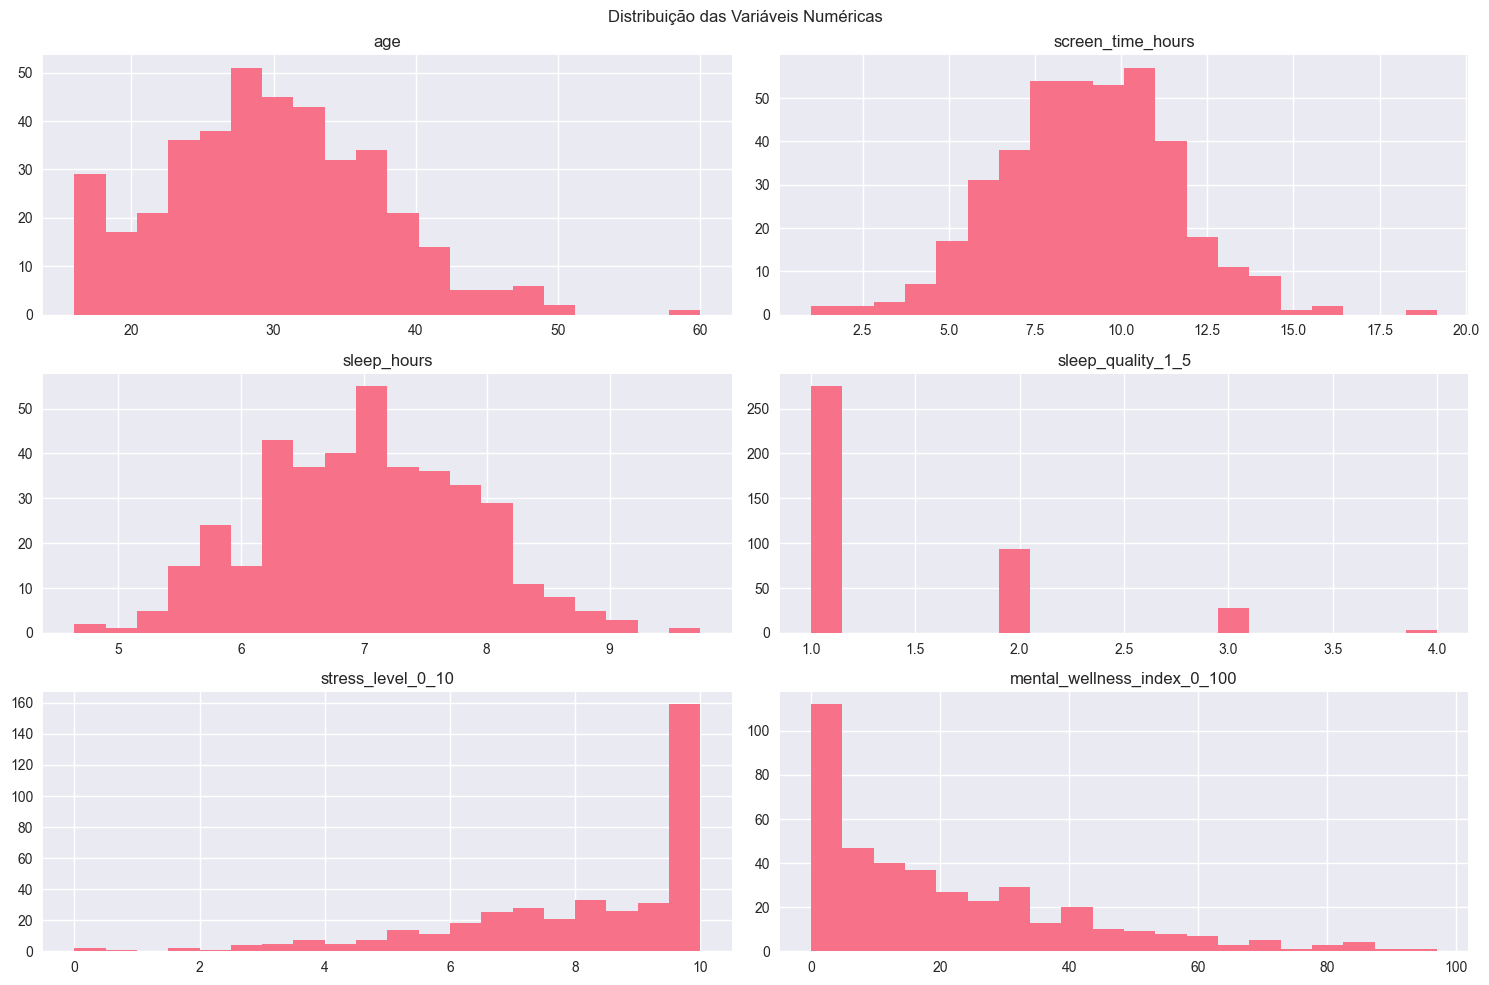

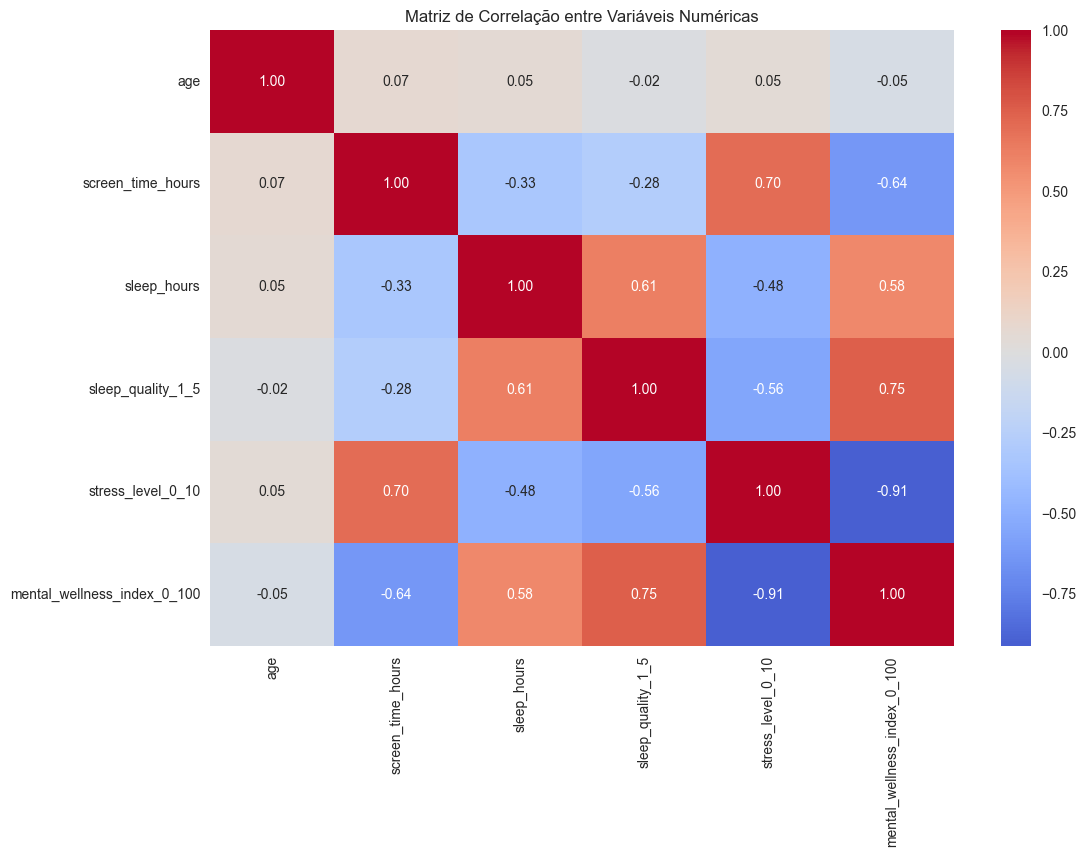

In [3]:
# Célula 3 - Visualizações básicas

# 1. Histogramas das variáveis principais
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.tight_layout()
plt.show()

# 2. Correlação entre variáveis
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()